##Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

##Base de dados 2019

In [2]:
df = pd.read_parquet('citibike2018_2019_sample.parquet')
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,882,2018-11-25 18:21:38.7740,2018-11-25 18:36:21.4720,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,-73.979661,20049,Customer,1969,0
1,669,2018-08-13 18:25:50.5440,2018-08-13 18:36:59.9680,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,33847,Subscriber,1987,1
2,521,2018-12-18 20:12:15.0620,2018-12-18 20:20:57.0170,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,-73.981656,30284,Subscriber,1971,1
3,270,2018-05-18 14:23:52.1050,2018-05-18 14:28:22.4910,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,-73.944118,31542,Subscriber,1964,1
4,441,2018-08-14 19:00:15.8670,2018-08-14 19:07:37.0520,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,-73.988084,18363,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26.3750,2019-06-12 22:37:05.2440,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,-73.987658,34104,Subscriber,1981,2
999996,294,2019-10-04 15:13:45.8830,2019-10-04 15:18:40.1010,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,-73.953820,14887,Subscriber,1986,1
999997,1386,2019-06-09 13:46:00.8280,2019-06-09 14:09:07.8220,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,-73.993379,25742,Subscriber,1987,1
999998,1648,2019-09-26 17:48:29.8300,2019-09-26 18:15:57.9630,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,-73.980252,32518,Subscriber,1995,1


## Limpeza e ajustes de atributos

In [3]:
df.isnull().sum()

tripduration                0
starttime                   0
stoptime                    0
start station id           73
start station name         73
start station latitude      0
start station longitude     0
end station id             73
end station name           73
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.999270e+05,999927.000000,999927.000000,999927.000000,999927.000000,999927.000000,999927.000000,999927.000000,999927.000000,999927.000000
mean,9.584879e+02,1626.302095,40.737289,-73.982320,1614.832814,40.736965,-73.982552,28129.269227,1979.595635,1.156037
std,1.074440e+04,1459.005319,0.032311,0.019388,1457.806272,0.032131,0.019456,7101.671318,12.042220,0.541276
min,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,0.000000
25%,3.600000e+02,380.000000,40.717548,-73.995168,380.000000,40.717548,-73.995481,21264.000000,1969.000000,1.000000
50%,6.110000e+02,508.000000,40.738046,-73.985417,507.000000,40.737262,-73.986022,29790.000000,1982.000000,1.000000
75%,1.071000e+03,3263.000000,40.757570,-73.971888,3260.000000,40.757148,-73.972652,33128.000000,1989.000000,1.000000
max,4.845976e+06,3911.000000,45.506364,-73.568906,3911.000000,45.506364,-73.568906,42046.000000,2003.000000,2.000000


In [6]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,882,2018-11-25 18:21:38.7740,2018-11-25 18:36:21.4720,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,-73.979661,20049,Customer,1969,0
1,669,2018-08-13 18:25:50.5440,2018-08-13 18:36:59.9680,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,33847,Subscriber,1987,1
2,521,2018-12-18 20:12:15.0620,2018-12-18 20:20:57.0170,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,-73.981656,30284,Subscriber,1971,1
3,270,2018-05-18 14:23:52.1050,2018-05-18 14:28:22.4910,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,-73.944118,31542,Subscriber,1964,1
4,441,2018-08-14 19:00:15.8670,2018-08-14 19:07:37.0520,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,-73.988084,18363,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26.3750,2019-06-12 22:37:05.2440,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,-73.987658,34104,Subscriber,1981,2
999996,294,2019-10-04 15:13:45.8830,2019-10-04 15:18:40.1010,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,-73.953820,14887,Subscriber,1986,1
999997,1386,2019-06-09 13:46:00.8280,2019-06-09 14:09:07.8220,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,-73.993379,25742,Subscriber,1987,1
999998,1648,2019-09-26 17:48:29.8300,2019-09-26 18:15:57.9630,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,-73.980252,32518,Subscriber,1995,1


In [7]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

<ipython-input-8-029a164782fe>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


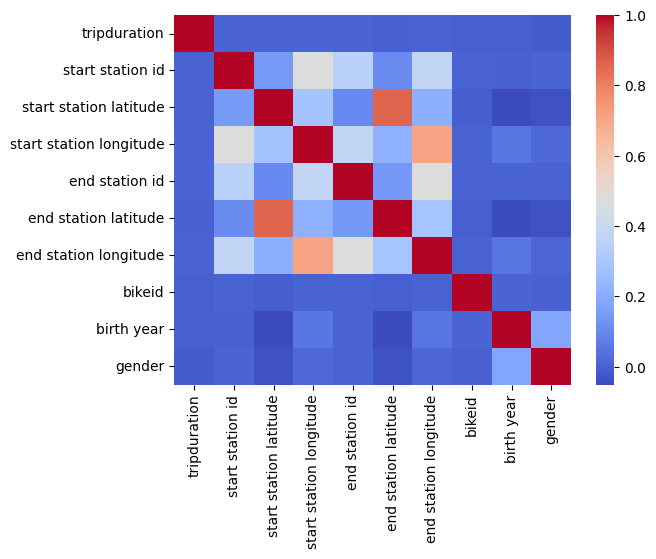

In [8]:
# Carregando o conjunto de dados Iris
iris = sns.load_dataset('iris')

# Criando a matriz de correlação
corr = df.corr()

# Plotando a matriz de correlação
sns.heatmap(corr, annot=False, cmap='coolwarm')

# Exibindo o gráfico
plt.show()

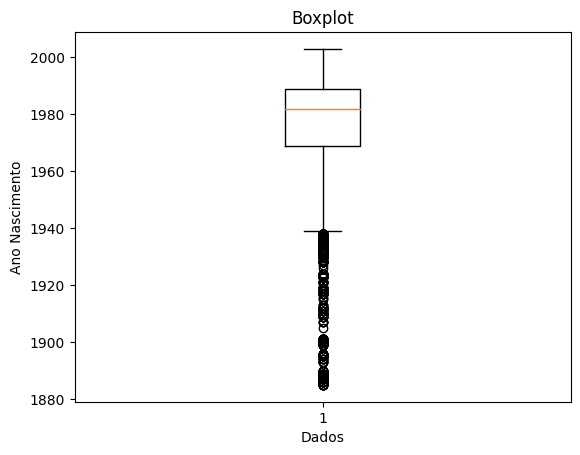

In [9]:
fig, ax = plt.subplots()
ax.boxplot(df['birth year'])

# Definindo o título e os rótulos dos eixos
ax.set_title('Boxplot')
ax.set_xlabel('Dados')
ax.set_ylabel('Ano Nascimento')

# Exibindo o gráfico
plt.show()

In [10]:
df['starttime'] = df['starttime'].apply(lambda x: x[0:19])
df['stoptime'] = df['stoptime'].apply(lambda x: x[0:19])

<ipython-input-10-7e5a92743b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['starttime'] = df['starttime'].apply(lambda x: x[0:19])
<ipython-input-10-7e5a92743b51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stoptime'] = df['stoptime'].apply(lambda x: x[0:19])


In [11]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,-73.979661,20049,Customer,1969,0
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,33847,Subscriber,1987,1
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,-73.981656,30284,Subscriber,1971,1
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,-73.944118,31542,Subscriber,1964,1
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,-73.988084,18363,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,-73.987658,34104,Subscriber,1981,2
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,-73.953820,14887,Subscriber,1986,1
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,-73.993379,25742,Subscriber,1987,1
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,-73.980252,32518,Subscriber,1995,1


In [12]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

<ipython-input-12-98894cd5ca7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['starttime'] = pd.to_datetime(df['starttime'])
<ipython-input-12-98894cd5ca7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stoptime'] = pd.to_datetime(df['stoptime'])


In [13]:
df['stt year'] = df['starttime'].dt.year
df['stp year'] = df['stoptime'].dt.year
df['stt hour'] = df['starttime'].dt.hour
df['stp hour'] = df['stoptime'].dt.hour
df['stt day'] = df['starttime'].dt.day
df['stp day'] = df['stoptime'].dt.day

<ipython-input-13-b6240e886aa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stt year'] = df['starttime'].dt.year
<ipython-input-13-b6240e886aa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stp year'] = df['stoptime'].dt.year
<ipython-input-13-b6240e886aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [14]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,stt year,stp year,stt hour,stp hour,stt day,stp day
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,20049,Customer,1969,0,2018,2018,18,18,25,25
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,33847,Subscriber,1987,1,2018,2018,18,18,13,13
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,30284,Subscriber,1971,1,2018,2018,20,20,18,18
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,31542,Subscriber,1964,1,2018,2018,14,14,18,18
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,18363,Subscriber,1979,1,2018,2018,19,19,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,...,34104,Subscriber,1981,2,2019,2019,22,22,12,12
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,...,14887,Subscriber,1986,1,2019,2019,15,15,4,4
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,...,25742,Subscriber,1987,1,2019,2019,13,14,9,9
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,...,32518,Subscriber,1995,1,2019,2019,17,18,26,26


In [15]:
# Ano qual a análise está sendo feita: 2023 
ano = 2020
df['age'] = ano - df['birth year']
df

<ipython-input-15-7581d0c3fbd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = ano - df['birth year']


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,stt year,stp year,stt hour,stp hour,stt day,stp day,age
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,Customer,1969,0,2018,2018,18,18,25,25,51
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,Subscriber,1987,1,2018,2018,18,18,13,13,33
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,Subscriber,1971,1,2018,2018,20,20,18,18,49
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,Subscriber,1964,1,2018,2018,14,14,18,18,56
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,Subscriber,1979,1,2018,2018,19,19,14,14,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,...,Subscriber,1981,2,2019,2019,22,22,12,12,39
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,...,Subscriber,1986,1,2019,2019,15,15,4,4,34
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,...,Subscriber,1987,1,2019,2019,13,14,9,9,33
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,...,Subscriber,1995,1,2019,2019,17,18,26,26,25


##Análises

In [16]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,stt year,stp year,stt hour,stp hour,stt day,stp day,age
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,Customer,1969,0,2018,2018,18,18,25,25,51
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,Subscriber,1987,1,2018,2018,18,18,13,13,33
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,Subscriber,1971,1,2018,2018,20,20,18,18,49
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,Subscriber,1964,1,2018,2018,14,14,18,18,56
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,Subscriber,1979,1,2018,2018,19,19,14,14,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,...,Subscriber,1981,2,2019,2019,22,22,12,12,39
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,...,Subscriber,1986,1,2019,2019,15,15,4,4,34
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,...,Subscriber,1987,1,2019,2019,13,14,9,9,33
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,...,Subscriber,1995,1,2019,2019,17,18,26,26,25


### Conversões temporais

In [17]:
entre_anos = df.loc[df['stp year']-df['stt year'] > 0]
entre_dias = df.loc[df['stp day']-df['stt day'] > 0]
entre_horas = df.loc[df['stp hour']-df['stt hour'] > 0]

###- Quais lugares tem mais saída e entrada de bicicletas?

In [18]:
df.groupby('start station id').size().sort_values(ascending=False).reset_index(name='quantidade')

,start station id,quantidade
0,519.0,8052
1,497.0,6079
2,435.0,5762
3,402.0,5742
4,285.0,5489
...,...,...
964,3828.0,1
965,3887.0,1
966,3833.0,1
967,3851.0,1


In [19]:
df.groupby('end station id').size().sort_values(ascending=False).reset_index(name='quantidade')

,end station id,quantidade
0,519.0,8124
1,497.0,6166
2,402.0,6093
3,435.0,5866
4,426.0,5718
...,...,...
977,3184.0,1
978,3872.0,1
979,3874.0,1
980,3875.0,1


In [20]:
df[df['end station id']==3911.0]['end station name']

612391    Wyckoff St & Nevins St
Name: end station name, dtype: object

### - Quais trajetos mais comuns?

In [21]:
# criando a coluna 'route id'
df['start end id'] = df['start station id'].astype(str) + '-' + df['end station id'].astype(str)

# criando o LabelEncoder
encoder = LabelEncoder()

# ajustando o encoder aos valores da coluna 'route id'
encoder.fit(df['start end id'])

# aplicando o encoder em um lote de dados
df['route id'] = encoder.transform(df['start end id'])

df

<ipython-input-21-498799109d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start end id'] = df['start station id'].astype(str) + '-' + df['end station id'].astype(str)
<ipython-input-21-498799109d28>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route id'] = encoder.transform(df['start end id'])


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,stt year,stp year,stt hour,stp hour,stt day,stp day,age,start end id,route id
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,0,2018,2018,18,18,25,25,51,423.0-476.0,143853
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,1,2018,2018,18,18,13,13,33,3467.0-327.0,93383
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,1,2018,2018,20,20,18,18,49,411.0-504.0,141103
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,1,2018,2018,14,14,18,18,56,437.0-3047.0,145980
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,1,2018,2018,19,19,14,14,41,519.0-498.0,170287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,...,2,2019,2019,22,22,12,12,39,3310.0-414.0,67060
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,...,1,2019,2019,15,15,4,4,34,3062.0-373.0,28498
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,...,1,2019,2019,13,14,9,9,33,311.0-143.0,36222
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,...,1,2019,2019,17,18,26,26,25,266.0-3680.0,17714


In [22]:
df.groupby('route id').size().sort_values(ascending=False).reset_index(name='mais populares')

,route id,mais populares
0,144741,417
1,6610,385
2,6699,301
3,20137,278
4,34117,278
...,...,...
178005,110917,1
178006,110915,1
178007,110913,1
178008,110910,1


In [23]:
df[df['route id']==144741][['start station name', 'end station name']]

,start station name,end station name
1937,E 7 St & Avenue A,Cooper Square & Astor Pl
4985,E 7 St & Avenue A,Cooper Square & Astor Pl
6470,E 7 St & Avenue A,Cooper Square & Astor Pl
8304,E 7 St & Avenue A,Cooper Square & Astor Pl
8797,E 7 St & Avenue A,Cooper Square & Astor Pl
...,...,...
977294,E 7 St & Avenue A,Cooper Square & Astor Pl
977498,E 7 St & Avenue A,Cooper Square & Astor Pl
984043,E 7 St & Avenue A,Cooper Square & Astor Pl
989001,E 7 St & Avenue A,Cooper Square & Astor Pl


### - Quais bicicletas são as mais utilizadas? (identificar pelo id)

In [24]:
df_bike = df.groupby('bikeid').size().sort_values(ascending=False).reset_index(name='mais utilizadas')
df_bike

,bikeid,mais utilizadas
0,32541,160
1,34143,148
2,32606,141
3,33877,140
4,29945,138
...,...,...
20147,29222,1
20148,29614,1
20149,29229,1
20150,29605,1


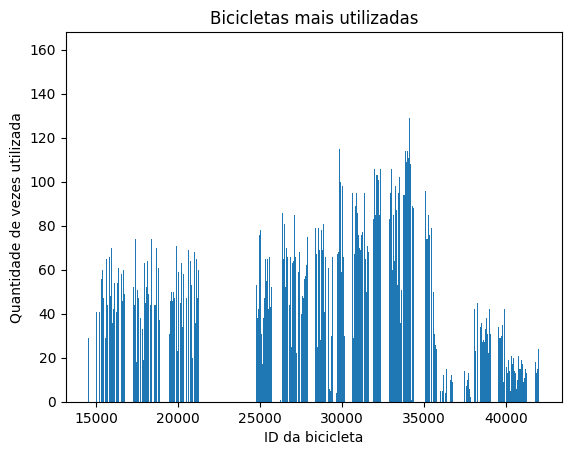

In [25]:
# plotando o gráfico de barras
plt.bar(df_bike['bikeid'], df_bike['mais utilizadas'])

# definindo o título e os labels dos eixos
plt.title('Bicicletas mais utilizadas')
plt.xlabel('ID da bicicleta')
plt.ylabel('Quantidade de vezes utilizada')

# exibindo o gráfico
plt.show()

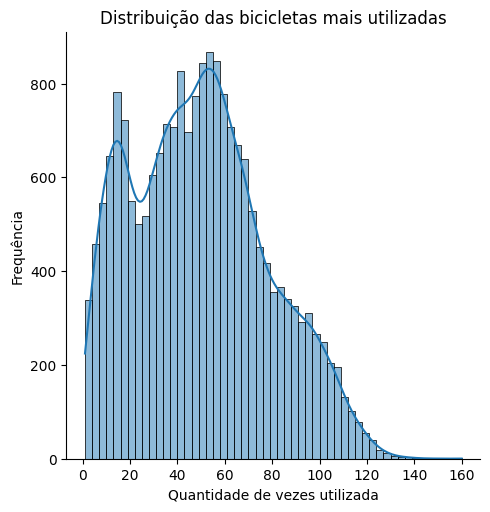

In [26]:
# plotando o gráfico de distribuição
sns.displot(df_bike['mais utilizadas'], kde=True)

# definindo o título e os labels dos eixos
plt.title('Distribuição das bicicletas mais utilizadas')
plt.xlabel('Quantidade de vezes utilizada')
plt.ylabel('Frequência')

# exibindo o gráfico
plt.show()

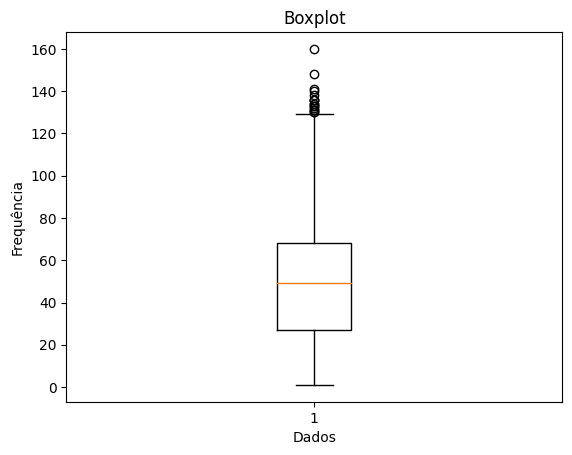

In [27]:
fig, ax = plt.subplots()
ax.boxplot(df_bike['mais utilizadas'])

# Definindo o título e os rótulos dos eixos
ax.set_title('Boxplot')
ax.set_xlabel('Dados')
ax.set_ylabel('Frequência')

# Exibindo o gráfico
plt.show()

### - Uso de bicicletas ao longo do tempo

In [28]:
df.groupby('bikeid').size().sort_values(ascending=False).reset_index(name='mais utilizadas')

,bikeid,mais utilizadas
0,32541,160
1,34143,148
2,32606,141
3,33877,140
4,29945,138
...,...,...
20147,29222,1
20148,29614,1
20149,29229,1
20150,29605,1


In [29]:
df.groupby([df['starttime'].dt.day]).size().sort_values(ascending=False).reset_index(name='mais utilizadas')

,starttime,mais utilizadas
0,14,35227
1,24,34658
2,8,34609
3,26,34442
4,15,34405
5,11,34081
6,19,33889
7,4,33595
8,20,33208
9,1,33207


### - Horarios de pico

In [30]:
df_2018 = df.loc[df['stt year'] == 2018]
df_2019 = df.loc[df['stt year'] == 2019]

In [31]:
df_2018

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,stt year,stp year,stt hour,stp hour,stt day,stp day,age,start end id,route id
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,0,2018,2018,18,18,25,25,51,423.0-476.0,143853
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,1,2018,2018,18,18,13,13,33,3467.0-327.0,93383
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,1,2018,2018,20,20,18,18,49,411.0-504.0,141103
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,1,2018,2018,14,14,18,18,56,437.0-3047.0,145980
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,1,2018,2018,19,19,14,14,41,519.0-498.0,170287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,834,2018-05-20 17:04:01,2018-05-20 17:17:55,3659.0,W 17 St & 9 Ave,40.742949,-74.004137,514.0,12 Ave & W 40 St,40.760875,...,2,2018,2018,17,17,20,20,51,3659.0-514.0,117168
499996,369,2018-11-28 17:08:16,2018-11-28 17:14:25,3386.0,1 Pl & Clinton St,40.680959,-73.999057,143.0,Clinton St & Joralemon St,40.692395,...,2,2018,2018,17,17,28,28,51,3386.0-143.0,80299
499997,456,2018-08-04 17:41:38,2018-08-04 17:49:14,312.0,Allen St & Stanton St,40.722055,-73.989111,473.0,Rivington St & Chrystie St,40.721101,...,0,2018,2018,17,17,4,4,51,312.0-473.0,38316
499998,879,2018-05-21 13:39:57,2018-05-21 13:54:37,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,305.0,E 58 St & 3 Ave,40.760958,...,1,2018,2018,13,13,21,21,51,2012.0-305.0,7744


In [32]:
saida_bike_hour = df.groupby('stt hour').size().sort_values(ascending=False).reset_index(name='qtd')
entrada_bike_hour = df.groupby('stp hour').size().sort_values(ascending=False).reset_index(name='qtd')

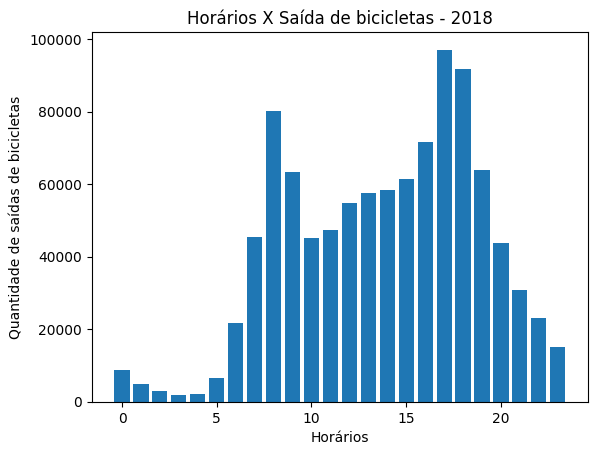

In [33]:
# plotando o gráfico de barras
plt.bar(saida_bike_hour['stt hour'], saida_bike_hour['qtd'])

# definindo o título e os labels dos eixos
plt.title('Horários X Saída de bicicletas - 2018')
plt.xlabel('Horários')
plt.ylabel('Quantidade de saídas de bicicletas')

# exibindo o gráfico
plt.show()

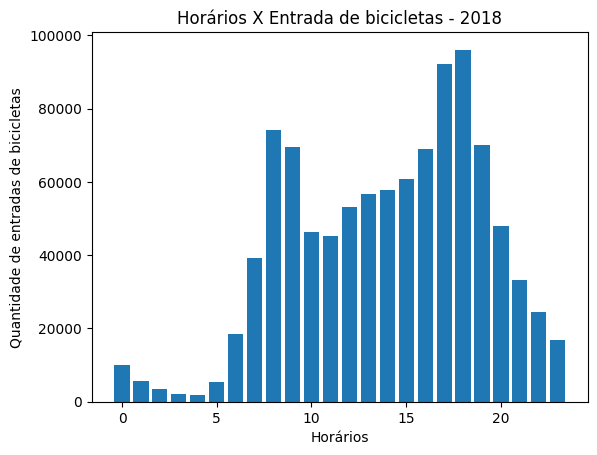

In [34]:
# plotando o gráfico de barras
plt.bar(entrada_bike_hour['stp hour'], entrada_bike_hour['qtd'])

# definindo o título e os labels dos eixos
plt.title('Horários X Entrada de bicicletas - 2018')
plt.xlabel('Horários')
plt.ylabel('Quantidade de entradas de bicicletas')

# exibindo o gráfico
plt.show()

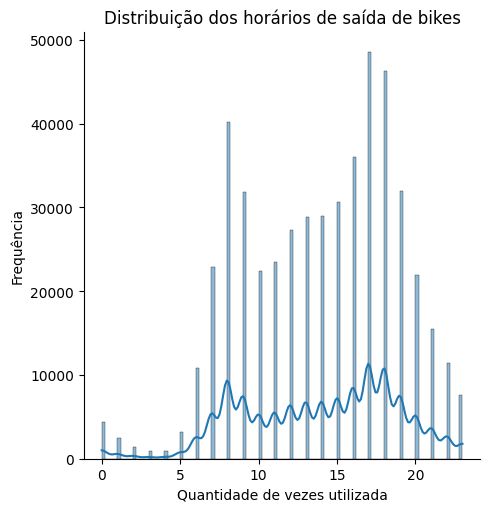

In [35]:
# plotando o gráfico de distribuição
sns.displot(df_2018['stt hour'], kde=True)

# definindo o título e os labels dos eixos
plt.title('Distribuição dos horários de saída de bikes')
plt.xlabel('Quantidade de vezes utilizada')
plt.ylabel('Frequência')

# exibindo o gráfico
plt.show()

In [36]:
# Encontrando a semana do ano para cada data
df_2018['week'] = df_2018['starttime'].apply(lambda x: int(x.strftime('%U')))

<ipython-input-36-7b37917c5ad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['week'] = df_2018['starttime'].apply(lambda x: int(x.strftime('%U')))


In [37]:
import pandas as pd

# Criando uma série de datas trimestrais
quarters_series = pd.Series(pd.period_range('2020Q1', freq='Q', periods=4))

# Extraindo o trimestre de cada data
quarters = quarters_series.dt.week

# Imprimindo o resultado
print(quarters)


0    14
1    27
2    40
3    53
dtype: int64


In [38]:
df_2018['day of year'] = df_2018['starttime'].dt.dayofyear
df_2019['day of year'] = df_2019['starttime'].dt.dayofyear

<ipython-input-38-9d6edf08c840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['day of year'] = df_2018['starttime'].dt.dayofyear
<ipython-input-38-9d6edf08c840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['day of year'] = df_2019['starttime'].dt.dayofyear


In [39]:
df_2018.sort_values('day of year', inplace=True)
df_2018

<ipython-input-39-f1948a7a8174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.sort_values('day of year', inplace=True)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stp year,stt hour,stp hour,stt day,stp day,age,start end id,route id,week,day of year
442913,178,2018-01-01 12:05:45,2018-01-01 12:08:43,119.0,Park Ave & St Edwards St,40.696089,-73.978034,261.0,Johnson St & Gold St,40.694749,...,2018,12,12,1,1,22,119.0-261.0,244,0,1
331660,315,2018-01-01 11:50:25,2018-01-01 11:55:41,503.0,E 20 St & Park Ave,40.738274,-73.987520,2003.0,1 Ave & E 18 St,40.733812,...,2018,11,11,1,1,51,503.0-2003.0,165648,0,1
352018,558,2018-01-01 03:12:08,2018-01-01 03:21:27,505.0,6 Ave & W 33 St,40.749013,-73.988484,482.0,W 15 St & 7 Ave,40.739355,...,2018,3,3,1,1,33,505.0-482.0,166673,0,1
201185,301,2018-01-01 09:40:17,2018-01-01 09:45:18,229.0,Great Jones St,40.727434,-73.993790,368.0,Carmine St & 6 Ave,40.730386,...,2018,9,9,1,1,43,229.0-368.0,10870,0,1
118400,187,2018-01-01 11:49:04,2018-01-01 11:52:11,257.0,Lispenard St & Broadway,40.719392,-74.002472,355.0,Bayard St & Baxter St,40.716021,...,2018,11,11,1,1,27,257.0-355.0,15619,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396411,437,2018-12-31 14:38:02,2018-12-31 14:45:20,447.0,8 Ave & W 52 St,40.763707,-73.985162,529.0,W 42 St & 8 Ave,40.757570,...,2018,14,14,31,31,44,447.0-529.0,149062,52,365
316462,199,2018-12-31 07:22:21,2018-12-31 07:25:41,520.0,W 52 St & 5 Ave,40.759923,-73.976485,359.0,E 47 St & Park Ave,40.755103,...,2018,7,7,31,31,51,520.0-359.0,170526,52,365
183889,1400,2018-12-31 13:26:19,2018-12-31 13:49:40,499.0,Broadway & W 60 St,40.769155,-73.981918,487.0,E 20 St & FDR Drive,40.733143,...,2018,13,13,31,31,59,499.0-487.0,164660,52,365
112394,1775,2018-12-31 09:23:48,2018-12-31 09:53:23,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,423.0,W 54 St & 9 Ave,40.765849,...,2018,9,9,31,31,51,3164.0-423.0,48906,52,365


In [40]:
df_diario_anual_2018 = df_2018.groupby('day of year').size().sort_values(ascending=True).reset_index(name='qtd')
df_semanal_anual_2018 = df_2018.groupby('week').size().sort_values(ascending=True).reset_index(name='qtd')

In [41]:
df_diario_anual_2018

,day of year,qtd
0,4,61
1,80,98
2,6,125
3,5,147
4,1,165
...,...,...
360,270,2208
361,122,2211
362,177,2218
363,143,2220


<Axes: xlabel='day of year', ylabel='qtd'>

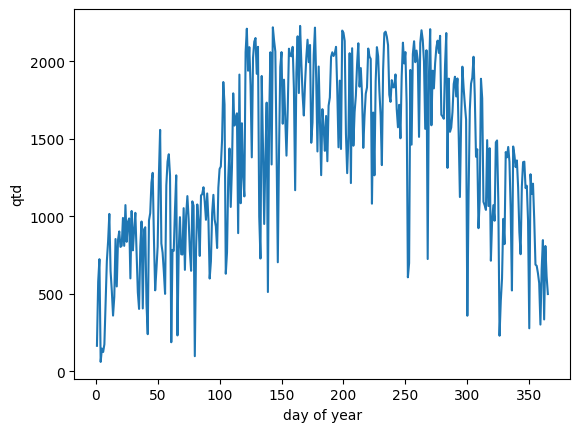

In [42]:
# Plotando o gráfico de linhas
sns.lineplot(x='day of year', y='qtd', data=df_diario_anual_2018)

In [43]:
from datetime import datetime, timedelta
from dateutil import relativedelta

def dia_do_ano_para_data(dia):
    ano_atual = datetime.now().year
    data = datetime(ano_atual, 1, 1) + timedelta(dia - 1)
    dias_no_ano = relativedelta.relativedelta(datetime(ano_atual+1,1,1), datetime(ano_atual,1,1)).days
    return data.strftime('%Y-%m-%d'), dias_no_ano

print(dia_do_ano_para_data(100))
print(dia_do_ano_para_data(310))

('2023-04-10', 0)
('2023-11-06', 0)


<Axes: xlabel='week', ylabel='qtd'>

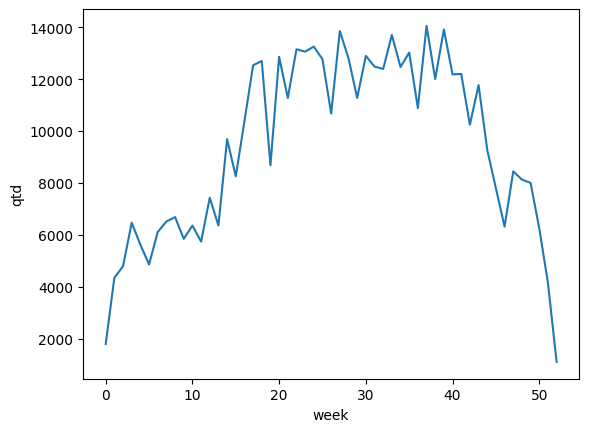

In [44]:
# Plotando o gráfico de linhas
sns.lineplot(x='week', y='qtd', data=df_semanal_anual_2018)

In [45]:
df['day of week'] = df['starttime'].dt.day_name()
df.head()

<ipython-input-45-e1f86c3095bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day of week'] = df['starttime'].dt.day_name()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stt year,stp year,stt hour,stp hour,stt day,stp day,age,start end id,route id,day of week
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,2018,2018,18,18,25,25,51,423.0-476.0,143853,Sunday
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,2018,2018,18,18,13,13,33,3467.0-327.0,93383,Monday
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,2018,2018,20,20,18,18,49,411.0-504.0,141103,Tuesday
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,2018,2018,14,14,18,18,56,437.0-3047.0,145980,Friday
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,2018,2018,19,19,14,14,41,519.0-498.0,170287,Tuesday


In [46]:
df_weekday = df.groupby('day of week').size().sort_values(ascending=True).reset_index(name='qtd')

In [47]:
df_weekday

,day of week,qtd
0,Sunday,114860
1,Saturday,132198
2,Monday,143069
3,Friday,150256
4,Thursday,151178
5,Tuesday,153465
6,Wednesday,154901


<Axes: xlabel='day of week', ylabel='qtd'>

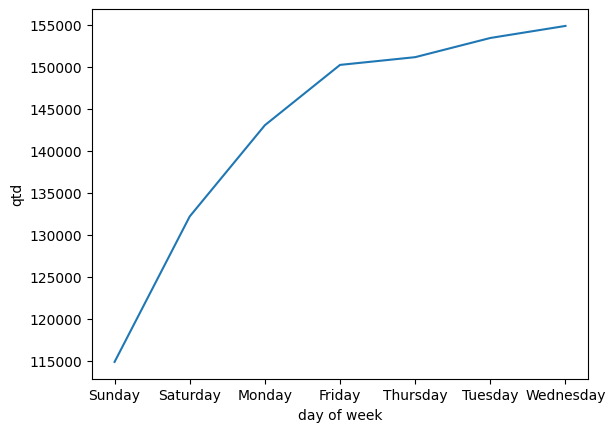

In [48]:
# Plotando o gráfico de linhas
sns.lineplot(x='day of week', y='qtd', data=df_weekday)

#### Previsão

In [49]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import plotly.graph_objs as go

In [51]:
df['startdate'] = df['starttime'].astype(str).str[:10]

<ipython-input-51-bd9354a89417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startdate'] = df['starttime'].astype(str).str[:10]


In [52]:
df_diario_anual_geral = df.groupby('startdate').size().sort_values(ascending=True).reset_index(name='qtd')

In [53]:
df_diario_anual_geral_ordenado = df_diario_anual_geral.sort_values('startdate', ascending=True)
df_diario_anual_geral_ordenado

,startdate,qtd
4,2018-01-01,165
63,2018-01-02,579
98,2018-01-03,724
0,2018-01-04,61
3,2018-01-05,147
...,...,...
138,2019-12-27,812
93,2019-12-28,703
27,2019-12-29,411
12,2019-12-30,273


In [54]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,stp year,stt hour,stp hour,stt day,stp day,age,start end id,route id,day of week,startdate
0,882,2018-11-25 18:21:38,2018-11-25 18:36:21,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,...,2018,18,18,25,25,51,423.0-476.0,143853,Sunday,2018-11-25
1,669,2018-08-13 18:25:50,2018-08-13 18:36:59,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,...,2018,18,18,13,13,33,3467.0-327.0,93383,Monday,2018-08-13
2,521,2018-12-18 20:12:15,2018-12-18 20:20:57,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,...,2018,20,20,18,18,49,411.0-504.0,141103,Tuesday,2018-12-18
3,270,2018-05-18 14:23:52,2018-05-18 14:28:22,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,...,2018,14,14,18,18,56,437.0-3047.0,145980,Friday,2018-05-18
4,441,2018-08-14 19:00:15,2018-08-14 19:07:37,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,...,2018,19,19,14,14,41,519.0-498.0,170287,Tuesday,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1658,2019-06-12 22:09:26,2019-06-12 22:37:05,3310.0,14 St & 7 Ave,40.663779,-73.983968,414.0,Pearl St & Anchorage Pl,40.702819,...,2019,22,22,12,12,39,3310.0-414.0,67060,Wednesday,2019-06-12
999996,294,2019-10-04 15:13:45,2019-10-04 15:18:40,3062.0,Myrtle Ave & Marcy Ave,40.695398,-73.949549,373.0,Willoughby Ave & Walworth St,40.693317,...,2019,15,15,4,4,34,3062.0-373.0,28498,Friday,2019-10-04
999997,1386,2019-06-09 13:46:00,2019-06-09 14:09:07,311.0,Norfolk St & Broome St,40.717227,-73.988021,143.0,Clinton St & Joralemon St,40.692395,...,2019,13,14,9,9,33,311.0-143.0,36222,Sunday,2019-06-09
999998,1648,2019-09-26 17:48:29,2019-09-26 18:15:57,266.0,Avenue D & E 8 St,40.723684,-73.975748,3680.0,E 43 St & 5 Ave,40.754121,...,2019,17,18,26,26,25,266.0-3680.0,17714,Thursday,2019-09-26


In [55]:
trace = go.Scatter(x=df_diario_anual_geral_ordenado['startdate'], y=df_diario_anual_geral_ordenado['qtd'], mode='lines')
data = [trace]
layout = go.Layout(title='Uso diário de Bikes Geral', xaxis=dict(title='Dia do ano'), yaxis=dict(title='Quantidade'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [56]:
df_diario_anual_geral_ordenado['startdate'] = pd.to_datetime(df_diario_anual_geral_ordenado['startdate'])

In [57]:
df_diario_anual_geral_ordenado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 4 to 117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   startdate  730 non-null    datetime64[ns]
 1   qtd        730 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.1 KB


In [58]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00


In [59]:
from pycaret.time_series import *

<Axes: >

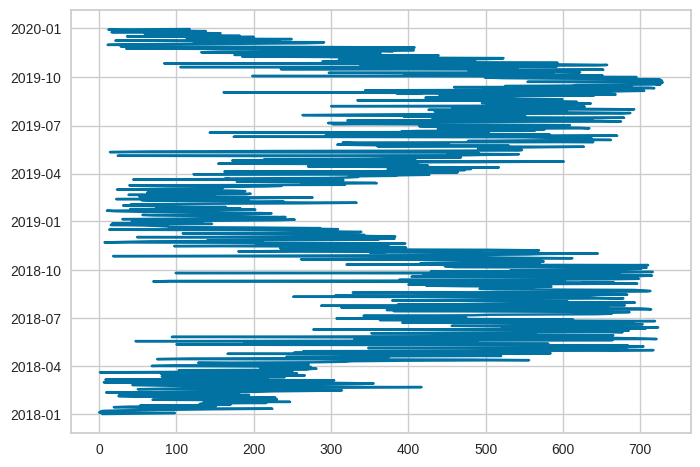

In [60]:
df_diario_anual_geral_ordenado['startdate'].plot()

In [61]:
df_diario_anual_geral_ordenado.dtypes

startdate    datetime64[ns]
qtd                   int64
dtype: object

In [62]:
df_diario_anual_geral_ordenado.set_index('startdate', drop=True, inplace=True)

<Axes: xlabel='startdate'>

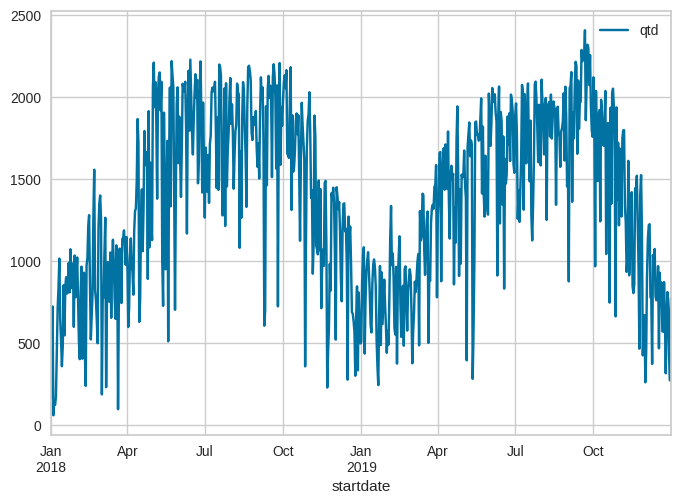

In [63]:
df_diario_anual_geral_ordenado.plot()

In [64]:
s = setup(df_diario_anual_geral_ordenado, fold=3, fh=60, session_id=123)

,Description,Value
0,session_id,123
1,Target,qtd
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(730, 1)"
5,Transformed data shape,"(730, 1)"
6,Transformed train set shape,"(670, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [65]:
plot_model()

In [66]:
plot_model(plot='train_test_split')

In [67]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9574,0.8905,303.1639,378.4277,0.2182,0.1874,-0.2504,1.4933
croston,Croston,1.0658,0.9203,337.2769,390.7671,0.2263,0.2122,-0.3349,0.0467
ets,ETS,1.1071,0.9426,350.0348,399.9991,0.2300,0.2255,-0.4106,0.3067
auto_arima,Auto ARIMA,1.1286,0.9588,357.0375,407.0058,0.2315,0.2259,-0.4451,41.2733
theta,Theta Forecaster,1.1466,0.9538,362.7346,404.8788,0.2341,0.2337,-0.4398,0.0967
arima,ARIMA,1.1714,1.1104,370.7267,471.5665,0.2412,0.2473,-0.9207,0.2433
stlf,STLF,1.1716,1.0285,370.7736,436.7415,0.2381,0.2407,-0.6474,0.0767
snaive,Seasonal Naive Forecaster,1.1861,1.1410,375.2944,484.4949,0.2421,0.2561,-1.0278,0.0900
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.2305,1.0138,389.6488,430.7062,0.2433,0.2491,-0.6220,2.1100
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.2332,1.0159,390.4985,431.5557,0.2436,0.2497,-0.6274,1.5200


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [68]:
predict_model(best, fh=160)

,y_pred
2019-11-02,1423.5409
2019-11-03,1254.6610
2019-11-04,1593.9755
2019-11-05,1665.5298
2019-11-06,1685.0486
...,...
2020-04-05,2217.8277
2020-04-06,2490.1672
2020-04-07,2584.1901
2020-04-08,2603.6595


In [69]:
final_best = finalize_model(best)

In [70]:
predict_model(final_best, fh=160)

,y_pred
2020-01-01,762.6502
2020-01-02,785.5457
2020-01-03,828.8579
2020-01-04,676.5549
2020-01-05,492.4010
...,...
2020-06-04,2331.3397
2020-06-05,2324.9997
2020-06-06,2153.7337
2020-06-07,1989.0499


In [71]:
plot_model(best, plot='forecast')

In [72]:
plot_model(best, plot='insample')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [73]:
lasso = create_model('llar_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-05-05,1.4708,1.1926,461.0281,502.2284,0.3144,0.3212,-0.9226
1,2019-07-04,0.9352,0.7784,301.1058,336.2041,0.1734,0.1828,-0.4709
2,2019-09-02,1.2938,1.0766,409.3615,456.2346,0.2430,0.2451,-0.4888
Mean,NaT,1.2332,1.0159,390.4985,431.5557,0.2436,0.2497,-0.6274
SD,NaT,0.2228,0.1745,66.6366,69.9895,0.0576,0.0566,0.2088


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_lasso = tune_model(lasso)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-05-05,1.5065,1.2219,472.2212,514.5813,0.3192,0.3304,-1.0183
1,2019-07-04,0.9292,0.7765,299.1615,335.4197,0.1738,0.1829,-0.4641
2,2019-09-02,1.2654,1.0551,400.3751,447.0886,0.2394,0.2402,-0.4297
Mean,NaT,1.2337,1.0178,390.5859,432.3632,0.2441,0.2512,-0.6374
SD,NaT,0.2367,0.1837,70.9896,73.8799,0.0594,0.0607,0.2698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.0s finished


In [75]:
plot_model(tuned_lasso, plot='forecast')

In [76]:
auto_arima = create_model('auto_arima')
plot_model(auto_arima, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-05-05,1.4741,1.2158,462.0885,512.0162,0.3194,0.3173,-0.9983
1,2019-07-04,0.7533,0.6492,242.5374,280.4193,0.1496,0.1442,-0.0233
2,2019-09-02,1.1583,1.0114,366.4867,428.5821,0.2254,0.2161,-0.3138
Mean,NaT,1.1286,0.9588,357.0375,407.0058,0.2315,0.2259,-0.4451
SD,NaT,0.2950,0.2343,89.8800,95.7721,0.0695,0.0710,0.4087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [77]:
s = setup(df_diario_anual_geral_ordenado, fold=5, fh=60, session_id=123)

,Description,Value
0,session_id,123
1,Target,qtd
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(730, 1)"
5,Transformed data shape,"(730, 1)"
6,Transformed train set shape,"(670, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [78]:
xgboost = create_model('xgboost_cds_dt')
plot_model(xgboost, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-01-05,0.5860,0.5250,191.5524,230.6185,0.2795,0.2804,-0.0563
1,2019-03-06,1.8964,1.5726,592.6383,664.5609,0.4313,0.5743,-3.0695
2,2019-05-05,2.5882,2.0995,811.3062,884.1562,0.5180,0.6550,-4.9586
3,2019-07-04,2.2183,1.8660,714.1969,805.9842,0.3954,0.5258,-7.4535
4,2019-09-02,1.7269,1.4298,546.4205,605.9069,0.2947,0.3500,-1.6258
Mean,NaT,1.8032,1.4986,571.2229,638.2453,0.3838,0.4771,-3.4327
SD,NaT,0.6760,0.5393,211.3315,226.4979,0.0886,0.1402,2.5804


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Prophet

In [79]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for ou

In [80]:
# from fbprophet import Prophet

ModuleNotFoundError: ignored

### - Quais idades que mais utilizam o serviço?

In [81]:
df_numer = df.groupby('age').size().sort_values(ascending=False).reset_index(name='quantidade')

In [82]:
# Removendo idades acima de 90 anos
df_idades_menos_90 = df.drop(df[df.age > 90].index)

In [83]:
df_idade_qtd = df_idades_menos_90.groupby('age').size().sort_values(ascending=False).reset_index(name='quantidade')
df_idade_qtd

,age,quantidade
0,51,89286
1,30,40298
2,31,40139
3,32,39754
4,29,38747
...,...,...
69,88,44
70,90,39
71,86,29
72,87,22


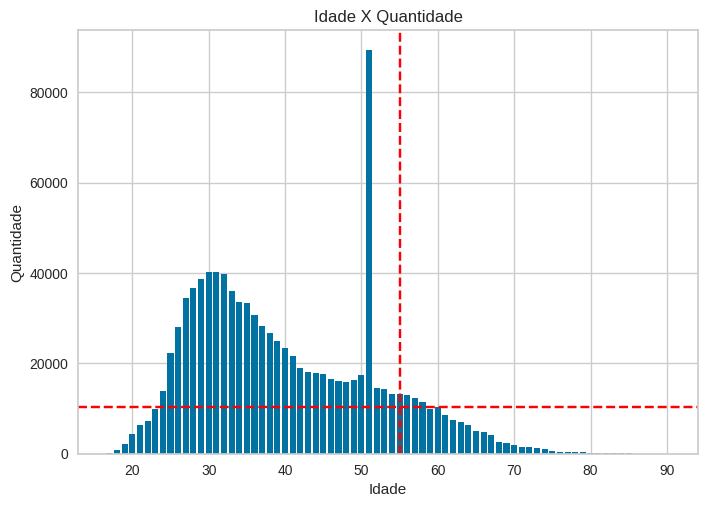

In [86]:
plt.bar(df_idade_qtd['age'], df_idade_qtd['quantidade'])

# Adicionar um título
plt.title('Idade X Quantidade')

# Adicionar rótulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Quantidade')

constante_y = 10354
plt.axhline(y=constante_y, color='red', linestyle='--')

constante_x = 55
plt.axvline(x=constante_x, color='red', linestyle='--')

# Mostrar o gráfico
plt.show()

In [87]:
calculo = df_idade_qtd['age']*df_idade_qtd['quantidade']
display(calculo)
mediana_calculo = np.median(calculo)
mediana_calculo

0     4553586
1     1208940
2     1244309
3     1272128
4     1123663
       ...   
69       3872
70       3510
71       2494
72       1914
73        712
Length: 74, dtype: int64

498977.0

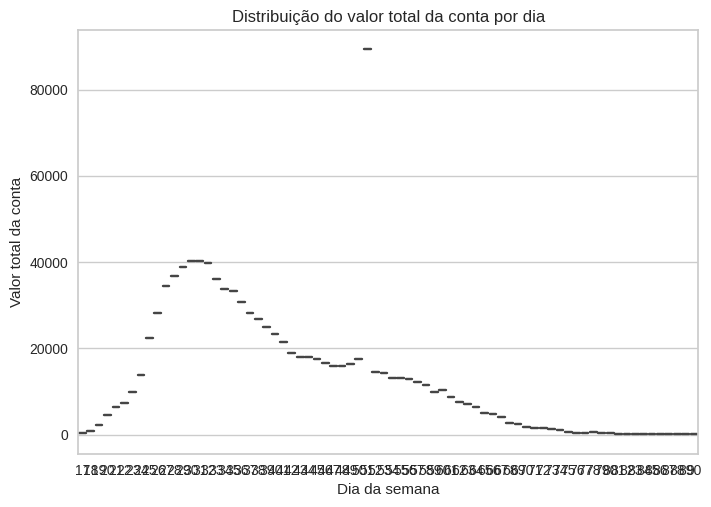

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um conjunto de dados aleatórios
dados = sns.load_dataset("tips")

# Criando o violin plot
sns.violinplot(x="age", y="quantidade", data=df_idade_qtd)

# Configurando o título e os rótulos dos eixos
plt.title("Distribuição do valor total da conta por dia")
plt.xlabel("Dia da semana")
plt.ylabel("Valor total da conta")

# Mostrando o gráfico
plt.show()


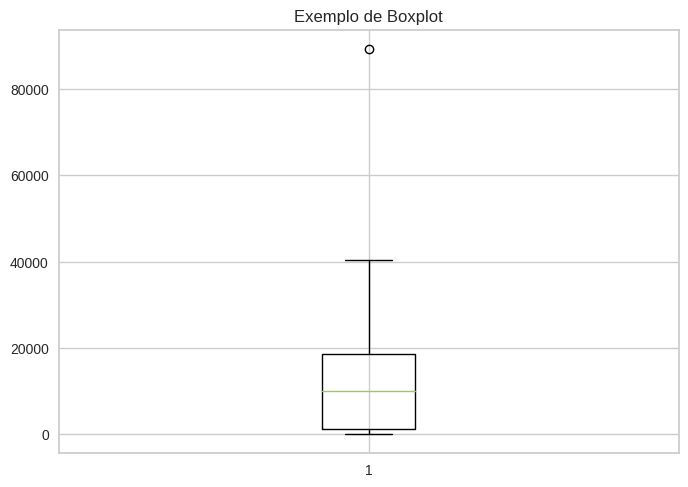

Mediana: 53.5


In [89]:
# Criar o boxplot
plt.boxplot(df_idade_qtd['quantidade'])

# Adicionar um título
plt.title('Exemplo de Boxplot')

# Mostrar o gráfico
plt.show()

mediana = np.median(df_idade_qtd['age'])
print(f'Mediana: {mediana}')

### - Quais gêneros que mais utilizam o serviço?

In [90]:
df_genero = df.groupby('gender').size().sort_values(ascending=False).reset_index(name='quantidade')
df_genero

,gender,quantidade
0,1,682623
1,2,236665
2,0,80639


### - Qual a proporção entre tipos de usuário?

In [91]:
df_subscribe = df.groupby('usertype').size().sort_values(ascending=False).reset_index(name='quantidade')
df_subscribe

,usertype,quantidade
0,Subscriber,874843
1,Customer,125084


In [92]:
total = df_subscribe.iloc[0][1]+df_subscribe.iloc[1][1]
subscriber_percent = round((df_subscribe.iloc[0][1]/total)*100, 2)
print(f'Percentual de inscritos: {subscriber_percent}%')
print(f'Percentual de não inscritos: {round(100-subscriber_percent, 2)}%')

Percentual de inscritos: 87.49%
Percentual de não inscritos: 12.51%
